# 6: Classification using decision trees

Decision trees are one of the most popular methods from classical machine learning. They are great for situations with small data sets with structured data, such as tables of features.

## Concepts covered

* Supervised machine learning
* Classical machine learning
* Parameters/hyperparameters
* Decision trees
* Overfitting
* Evaluation/metrics
* Test/train split, cross-validation
* Bagging and boosting

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
plt.style.use('ggplot')

## Some helper functions in advance

This is just a function to help make some nice plots of our results.

In [3]:
def visualize_classifier(model, ax=None, cmap='viridis'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=20, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3, alpha=0.7, edgecolors='black' )
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## Set up the data

For this lecture and example we will be using a dataset of `blobs` that is generated automatically by `scikit-learn`. We generate a dataset of 300 samples with 4 different centres of the data. Use the code below to generate and plot the data.

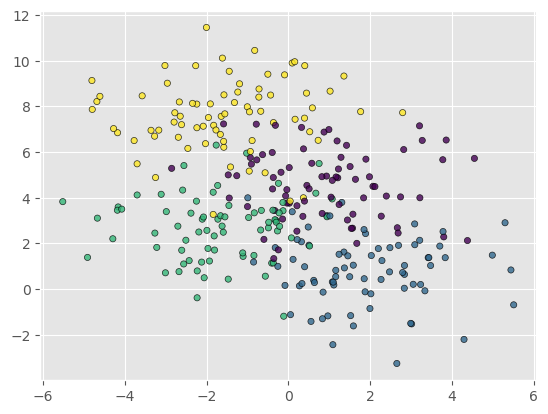

In [4]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=20, alpha=0.8, edgecolors='black')

## Setting up a decision tree

We can import a decision tree classifier from `scikit-learn` and use this to try to classify the data into clsuters.

Go to [lecture notes]() to cover the theory of decision trees

### Hyperparameters

There are many hyperparameters that can be set for the decision tree classifier. For the purposes of this tutorial we will consider only a few of these. For a full list see [the `DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

#### `max_depth`

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain fewer than `min_samples_split` samples.

#### `min_samples_split`

The minimum number of samples required to split an internal node:

    * If int, then consider min_samples_split as the minimum number.
    * If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
    
#### `max_features`

The maximum number of features of the input data that can be used for splitting. If this is left as `None` then the `max_features` is the number of features.

#### Our model

For our model we will simply go with the default hyperparameters and see how the network performs.

In [5]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

## Fit the model to our data

In this instance we do not need to do much feature engineering - the data that we have are relatively simple and have only two features; the coordinates on the plane. 

The model objects in `scikit-learn` have a `fit` method, which takes the feature `X` and label `y` data as inputs and fits the model. Use the code below to fit the model and then use the `visualize_classifier` helper function to look at the result.

In [6]:
tree = decision_tree.fit(X, y)

/tmp/ipykernel_6938/3210908485.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


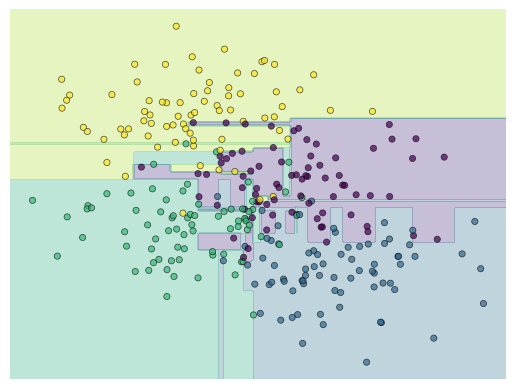

In [8]:
visualize_classifier(tree)

Notice that in the middle there seem to be rather arbitrary classification of regions of the data. Try rerunnig the clustering for different random sub-sets of the training data.

/tmp/ipykernel_6938/3210908485.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
/tmp/ipykernel_6938/3210908485.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


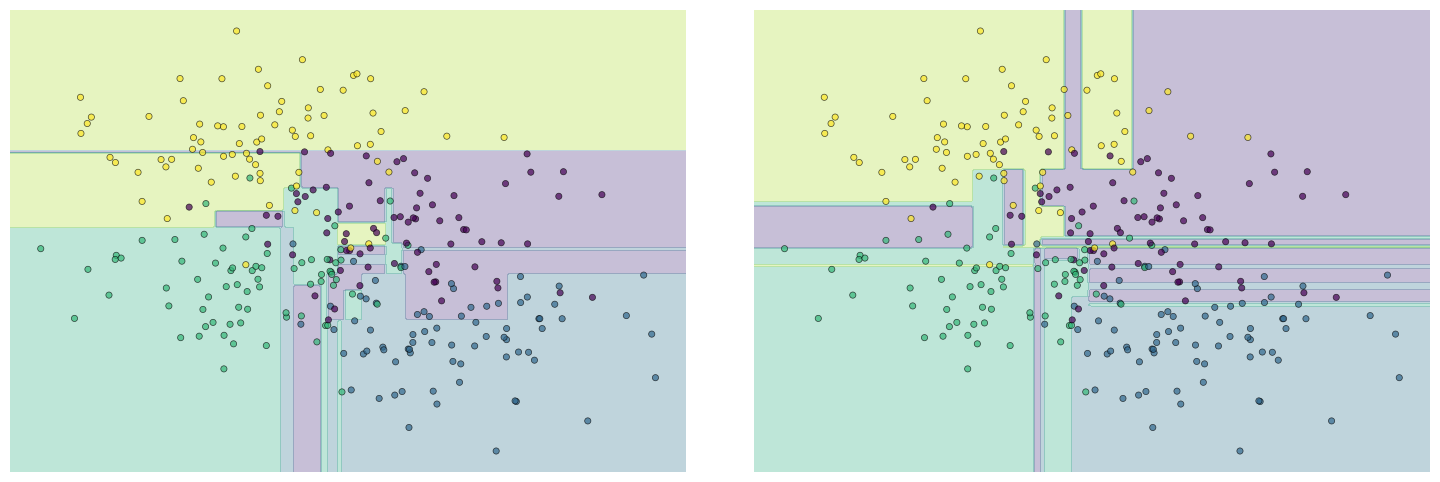

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
decision_tree = tree.fit(X[::2], y[::2])
visualize_classifier(tree, ax=ax[0])
decision_tree = tree.fit(X[1::2], y[1::2])
visualize_classifier(tree, ax=ax[1])

You can see that the classification is consistent in some regions, but quite different in the centre of the plot. It is concerning that the details of the classification in the centre of the plot are depedent on the training data. This is a classic sign that the model is **overfitting**.

Of course, we can see visually that this overfitting is occuring, but is there a more systematic way of detecting overfitting?

To do this we first need to have an objective measure of how well the model is performing. We need a **metric**.

Go to [lecture notes]() to cover metrics for evaluation of models.

## Evaluation

We are now in a position to evaluate how the model is performing. Let's start by once again fitting the model to our dataset `(X, y)`. 

Next we get the predicted values of `y` by using the `predict` method of the new model.

Finally use the `accuracy_score` metric from `scikit-learn` to get the accuracy of the model on this data

In [11]:
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier().fit(X, y)
y_pred = tree.predict(X)
print(accuracy_score(y, y_pred))

1.0


That's pretty accurate!!

But wait up a moment - let's try the model on some new data - generated the same way as before, but which was not used in the training.

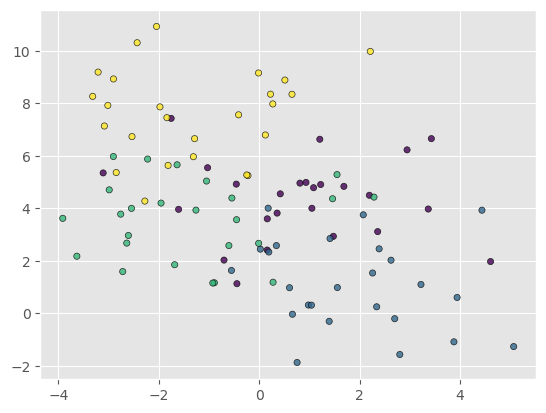

In [12]:
Xnew, ynew = make_blobs(n_samples=100, centers=4,
                  random_state=0, cluster_std=1.6)
plt.scatter(Xnew[:, 0], Xnew[:, 1], marker='o', edgecolors='black', c=ynew, s=20, alpha=0.8)

In [13]:
y_pred = tree.predict(Xnew)
print(accuracy_score(ynew, y_pred))

0.68


That's not quite as good as before!

The model is overfitting - i.e. it is performing well on training data but not generalising beyond the training set. This often results when the model has too many *parameters* and fits too flexibly to the training data. The number of parameters in the model is a *hyper parameter* and must be specified to choose the model. 

## Hyperparameter tuning and crossvalidation

We are going to use a training/test split and cross-validation to tune the hyper parameters of the model. Go to the [lecture notes]() for some more in-depth examples.

Below is some code to set up a search across the `max_depth` parameter ranging from 1 - 20. For each value of the hyperparameter, we use a 5-fold cross validation.

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 20, 1)}
tree = DecisionTreeClassifier()
search = GridSearchCV(tree, param_grid, cv=5)
gs = search.fit(X, y)

Text(0, 0.5, 'Val Accuracy')

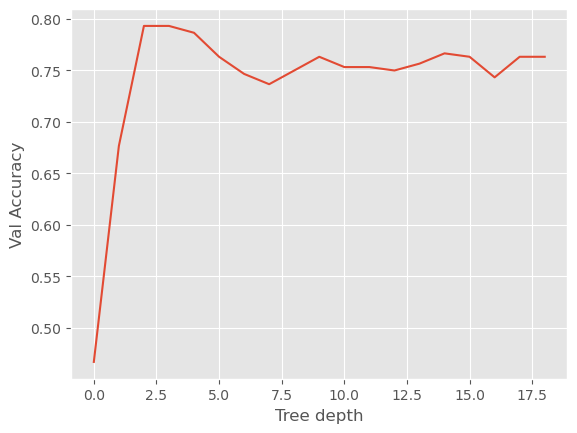

In [15]:
plt.plot(search.cv_results_['mean_test_score'])
plt.xlabel('Tree depth')
plt.ylabel('Val Accuracy')

You should see that the cross-validation score has a maximum at somewhere around 3 for the `max_depth`.
We take the best performing hyperparameter and retrain the model on the full dataset, we than apply this model to the new, unseen data and see how it performs.

In [16]:
depth = gs.best_params_['max_depth']
tree = DecisionTreeClassifier(max_depth=depth).fit(X, y)
y_pred = tree.predict(Xnew)
print(accuracy_score(ynew, y_pred))

0.71


##  Bagging and boosting

We can improve the performance of decision trees in two simple ways. Bagging and boosting. Bagging involves training an ensemble of trees on subsets of the training set. This way we can take the average result of the ensemble rather than any given individual result.

Boosting involves training a new decision tree based on the errors of the first tree. See the [lecture notes]() for a more in depth discussion of bagging and boosting.

/tmp/ipykernel_6938/3210908485.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


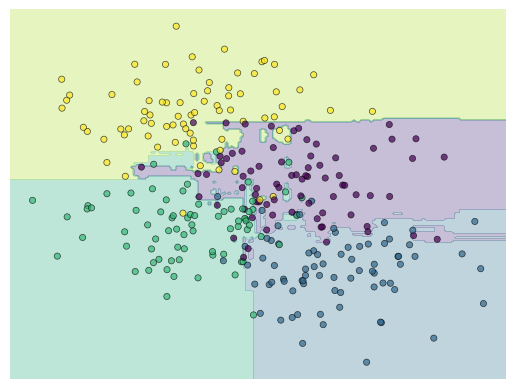

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=300, random_state=0)
model = forest.fit(X, y)
visualize_classifier(model)

In [18]:
y_pred = forest.predict(Xnew)
print(accuracy_score(ynew, y_pred))

0.7


### Hyperparams

Try to do hyperparameter tuning on the boosted decision tree to see if you can improve this result.

In [23]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "n_estimators": [1, 20, 50, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100]
}
search_cv = RandomizedSearchCV(
    forest, param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=100, random_state=0, n_jobs=2,
)
search_cv.fit(X, y.ravel())

/home/keeeto/mambaforge/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=300,
                                                    random_state=0),
                   n_iter=100, n_jobs=2,
                   param_distributions={'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 20, 50, 200, 500]},
                   random_state=0, scoring='neg_mean_absolute_error')

In [28]:
best_forest = search_cv.best_estimator_
y_pred = best_forest.predict(Xnew)
print(accuracy_score(ynew, y_pred))

0.74
